In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
print(tf.__version__)

2.8.0


In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.keras.backend.clear_session()

In [5]:
dataset_lists = tfds.list_builders()
dataset_lists

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adroit_hammer',
 'd4rl_adroit_pen',
 'd4rl_adroit_relocate',
 'd4rl_mujoco_ant',
 'd4

In [6]:
print("fashion_mnist" in dataset_lists)

True


In [7]:
(training_data, testing_data), metadata = tfds.load("fashion_mnist",
                               as_supervised=True,
                               with_info=True,
                               shuffle_files=False,
                               split=["train", "test"])

In [8]:
num_examples = metadata.splits["train"].num_examples
num_examples

60000

In [9]:
split_size = int(0.8 * num_examples)
train_data = training_data.take(split_size)
val_data = training_data.skip(split_size)

In [10]:
len(train_data), len(val_data)

(48000, 12000)

In [11]:
sample_train_data = train_data.take(10)
sample_10_images = []
sample_10_labels = []
for data in sample_train_data.as_numpy_iterator():
    img, label = data
    sample_10_images.append(img)
    sample_10_labels.append(label)

In [12]:
len(sample_10_images), len(sample_10_labels)

(10, 10)

In [13]:
class_names = metadata.features["label"].names
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [14]:
sample_10_labels

[2, 1, 8, 4, 1, 9, 2, 2, 0, 2]

In [15]:
import random
def view_random_train_images(images, labels):
    random_num = random.randint(0, len(images)-1)
    random_img = images[random_num]
    random_label = labels[random_num]
    random_class = class_names[random_label]
    print(random_img.shape)
    plt.figure(figsize=(10, 7))
    plt.imshow(random_img)
    plt.title(f"Class name: {random_class}")
    plt.axis(False)

(28, 28, 1)


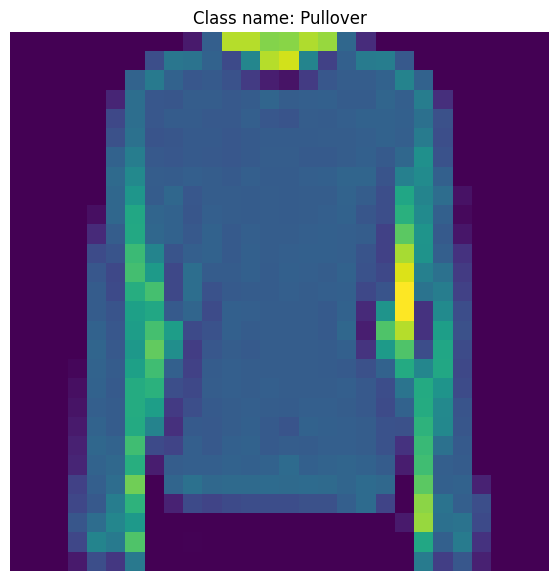

In [16]:
view_random_train_images(sample_10_images, sample_10_labels)

In [17]:
tf.reduce_min(sample_10_images[0]), tf.reduce_max(sample_10_images[0])

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

In [165]:
# Callbacks
import datetime
import os

CHECKPOINT_PATH = "model_experiments_fashion_mnist"
LOGS_PATH = "model_logs_fashion_mnist"

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True, verbose=1)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=2, factor=0.1, verbose=1, min_lr=1e-6)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/10), verbose=1)

def tensorboard(model_name):
    return tf.keras.callbacks.TensorBoard(os.path.join(LOGS_PATH, model_name, datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))

def checkpoint(model_name):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(CHECKPOINT_PATH, model_name), monitor="val_loss", save_best_only=True, verbose=1)

C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\joblib\_memmapping_reducer.py:598: UserWarning: Failed to delete temporary folder: C:\Users\yihim\AppData\Local\Temp\joblib_memmapping_folder_51412_4d7a5e81692e44c5a36f8a920cb73eba_2092e9671faf4704823b4ca42ab36eb1
  warnings.warn("Failed to delete temporary folder: {}"
C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\joblib\_memmapping_reducer.py:598: UserWarning: Failed to delete temporary folder: C:\Users\yihim\AppData\Local\Temp\joblib_memmapping_folder_51412_e81ca2086e0b477086f8d53552925ce5_f49ecf316d9a4168b3b4ca8992d9a07d
  warnings.warn("Failed to delete temporary folder: {}"
C:\Users\yihim\anaconda3\envs\mldl\lib\site-packages\joblib\_memmapping_reducer.py:598: UserWarning: Failed to delete temporary folder: C:\Users\yihim\AppData\Local\Temp\joblib_memmapping_folder_51412_4d7a5e81692e44c5a36f8a920cb73eba_85f1b0e0280b4a0195162361f183c5f3
  warnings.warn("Failed to delete temporary folder: {}"
C:\Users\yihim\anaconda3\envs\m

In [19]:
# Classification
model_1 = tf.keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(len(class_names), activation="softmax")
], name="model_1_clf")

model_1.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [20]:
def preprocess_data(image, label):
    image = tf.cast(image, dtype=tf.float32)
    image = image/255.
    return image, label

In [21]:
train_data = train_data.map(map_func=preprocess_data).batch(64).prefetch(tf.data.AUTOTUNE)
val_data = val_data.map(map_func=preprocess_data).batch(64).prefetch(tf.data.AUTOTUNE)
test_data = testing_data.map(map_func=preprocess_data).batch(64).prefetch(tf.data.AUTOTUNE)

In [22]:
model_1_history = model_1.fit(train_data,
                              validation_data=val_data,
                              epochs=20,
                              steps_per_epoch=len(train_data),
                              validation_steps=len(val_data),
                              callbacks=[tensorboard(model_1.name),
                                         checkpoint(model_1.name),
                                         early_stopping,
                                         reduce_lr])

Epoch 1/20
748/750 [============================>.] - ETA: 0s - loss: 0.5194 - accuracy: 0.8156
Epoch 1: val_loss improved from inf to 0.40156, saving model to model_experiments\model_1_clf
INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


750/750 [==============================] - 6s 8ms/step - loss: 0.5192 - accuracy: 0.8157 - val_loss: 0.4016 - val_accuracy: 0.8531 - lr: 0.0010
Epoch 2/20
744/750 [============================>.] - ETA: 0s - loss: 0.3797 - accuracy: 0.8623
Epoch 2: val_loss improved from 0.40156 to 0.35748, saving model to model_experiments\model_1_clf
INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.3795 - accuracy: 0.8623 - val_loss: 0.3575 - val_accuracy: 0.8695 - lr: 0.0010
Epoch 3/20
739/750 [============================>.] - ETA: 0s - loss: 0.3393 - accuracy: 0.8764
Epoch 3: val_loss improved from 0.35748 to 0.33075, saving model to model_experiments\model_1_clf
INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


750/750 [==============================] - 5s 6ms/step - loss: 0.3392 - accuracy: 0.8764 - val_loss: 0.3308 - val_accuracy: 0.8776 - lr: 0.0010
Epoch 4/20
749/750 [============================>.] - ETA: 0s - loss: 0.3142 - accuracy: 0.8849
Epoch 4: val_loss improved from 0.33075 to 0.32483, saving model to model_experiments\model_1_clf
INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


750/750 [==============================] - 5s 6ms/step - loss: 0.3143 - accuracy: 0.8849 - val_loss: 0.3248 - val_accuracy: 0.8788 - lr: 0.0010
Epoch 5/20
743/750 [============================>.] - ETA: 0s - loss: 0.2931 - accuracy: 0.8932
Epoch 5: val_loss improved from 0.32483 to 0.31724, saving model to model_experiments\model_1_clf
INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


750/750 [==============================] - 5s 7ms/step - loss: 0.2932 - accuracy: 0.8931 - val_loss: 0.3172 - val_accuracy: 0.8831 - lr: 0.0010
Epoch 6/20
741/750 [============================>.] - ETA: 0s - loss: 0.2754 - accuracy: 0.8990
Epoch 6: val_loss improved from 0.31724 to 0.31353, saving model to model_experiments\model_1_clf
INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.2756 - accuracy: 0.8989 - val_loss: 0.3135 - val_accuracy: 0.8865 - lr: 0.0010
Epoch 7/20
738/750 [============================>.] - ETA: 0s - loss: 0.2645 - accuracy: 0.9022
Epoch 7: val_loss improved from 0.31353 to 0.30930, saving model to model_experiments\model_1_clf
INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.2642 - accuracy: 0.9022 - val_loss: 0.3093 - val_accuracy: 0.8892 - lr: 0.0010
Epoch 8/20
740/750 [============================>.] - ETA: 0s - loss: 0.2509 - accuracy: 0.9063
Epoch 8: val_loss improved from 0.30930 to 0.30094, saving model to model_experiments\model_1_clf
INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


750/750 [==============================] - 4s 6ms/step - loss: 0.2511 - accuracy: 0.9060 - val_loss: 0.3009 - val_accuracy: 0.8939 - lr: 0.0010
Epoch 9/20
743/750 [============================>.] - ETA: 0s - loss: 0.2390 - accuracy: 0.9117
Epoch 9: val_loss did not improve from 0.30094
750/750 [==============================] - 4s 5ms/step - loss: 0.2393 - accuracy: 0.9114 - val_loss: 0.3106 - val_accuracy: 0.8925 - lr: 0.0010
Epoch 10/20
744/750 [============================>.] - ETA: 0s - loss: 0.2303 - accuracy: 0.9142
Epoch 10: val_loss did not improve from 0.30094

Epoch 10: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
750/750 [==============================] - 4s 6ms/step - loss: 0.2305 - accuracy: 0.9141 - val_loss: 0.3113 - val_accuracy: 0.8921 - lr: 0.0010
Epoch 11/20
745/750 [============================>.] - ETA: 0s - loss: 0.2003 - accuracy: 0.9254
Epoch 11: val_loss improved from 0.30094 to 0.27754, saving model to model_experiments\model_1_clf
INFO:

INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


750/750 [==============================] - 5s 6ms/step - loss: 0.2001 - accuracy: 0.9255 - val_loss: 0.2775 - val_accuracy: 0.9013 - lr: 1.0000e-04
Epoch 12/20
747/750 [============================>.] - ETA: 0s - loss: 0.1901 - accuracy: 0.9292
Epoch 12: val_loss improved from 0.27754 to 0.27743, saving model to model_experiments\model_1_clf
INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


750/750 [==============================] - 5s 6ms/step - loss: 0.1900 - accuracy: 0.9292 - val_loss: 0.2774 - val_accuracy: 0.9018 - lr: 1.0000e-04
Epoch 13/20
738/750 [============================>.] - ETA: 0s - loss: 0.1862 - accuracy: 0.9310
Epoch 13: val_loss improved from 0.27743 to 0.27732, saving model to model_experiments\model_1_clf
INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


750/750 [==============================] - 4s 6ms/step - loss: 0.1859 - accuracy: 0.9312 - val_loss: 0.2773 - val_accuracy: 0.9016 - lr: 1.0000e-04
Epoch 14/20
748/750 [============================>.] - ETA: 0s - loss: 0.1822 - accuracy: 0.9323
Epoch 14: val_loss did not improve from 0.27732
750/750 [==============================] - 4s 5ms/step - loss: 0.1823 - accuracy: 0.9324 - val_loss: 0.2780 - val_accuracy: 0.9021 - lr: 1.0000e-04
Epoch 15/20
739/750 [============================>.] - ETA: 0s - loss: 0.1792 - accuracy: 0.9335
Epoch 15: val_loss did not improve from 0.27732

Epoch 15: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
750/750 [==============================] - 4s 5ms/step - loss: 0.1790 - accuracy: 0.9336 - val_loss: 0.2786 - val_accuracy: 0.9022 - lr: 1.0000e-04
Epoch 16/20
746/750 [============================>.] - ETA: 0s - loss: 0.1747 - accuracy: 0.9357
Epoch 16: val_loss improved from 0.27732 to 0.27159, saving model to model_experiments\mod

INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


750/750 [==============================] - 5s 6ms/step - loss: 0.1747 - accuracy: 0.9356 - val_loss: 0.2716 - val_accuracy: 0.9033 - lr: 1.0000e-05
Epoch 17/20
747/750 [============================>.] - ETA: 0s - loss: 0.1728 - accuracy: 0.9365
Epoch 17: val_loss improved from 0.27159 to 0.27138, saving model to model_experiments\model_1_clf
INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


750/750 [==============================] - 4s 6ms/step - loss: 0.1728 - accuracy: 0.9364 - val_loss: 0.2714 - val_accuracy: 0.9028 - lr: 1.0000e-05
Epoch 18/20
740/750 [============================>.] - ETA: 0s - loss: 0.1721 - accuracy: 0.9367
Epoch 18: val_loss improved from 0.27138 to 0.27128, saving model to model_experiments\model_1_clf
INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_clf\assets


750/750 [==============================] - 4s 6ms/step - loss: 0.1722 - accuracy: 0.9366 - val_loss: 0.2713 - val_accuracy: 0.9028 - lr: 1.0000e-05
Epoch 19/20
749/750 [============================>.] - ETA: 0s - loss: 0.1716 - accuracy: 0.9369
Epoch 19: val_loss did not improve from 0.27128
750/750 [==============================] - 4s 5ms/step - loss: 0.1717 - accuracy: 0.9369 - val_loss: 0.2713 - val_accuracy: 0.9027 - lr: 1.0000e-05
Epoch 20/20
748/750 [============================>.] - ETA: 0s - loss: 0.1711 - accuracy: 0.9372
Epoch 20: val_loss did not improve from 0.27128

Epoch 20: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
750/750 [==============================] - 4s 5ms/step - loss: 0.1712 - accuracy: 0.9371 - val_loss: 0.2713 - val_accuracy: 0.9028 - lr: 1.0000e-05


In [23]:
%load_ext tensorboard

In [24]:
%tensorboard --logdir model_logs --port 8087

Reusing TensorBoard on port 8087 (pid 36264), started 1:25:56 ago. (Use '!kill 36264' to kill it.)

In [25]:
model_1_loaded = tf.keras.models.load_model("model_experiments/" + model_1.name)

In [26]:
model_1.evaluate(train_data), model_1.evaluate(val_data), model_1.evaluate(test_data)

157/157 [==============================] - 1s 4ms/step - loss: 0.3235 - accuracy: 0.8906


([0.17012448608875275, 0.9370625019073486],
 [0.27134352922439575, 0.9027500152587891],
 [0.32352811098098755, 0.8906000256538391])

In [27]:
model_1_loaded.evaluate(train_data), model_1_loaded.evaluate(val_data), model_1_loaded.evaluate(test_data)

157/157 [==============================] - 1s 4ms/step - loss: 0.3235 - accuracy: 0.8901


([0.17098397016525269, 0.9367291927337646],
 [0.271278977394104, 0.9028333425521851],
 [0.3234505355358124, 0.8901000022888184])

In [28]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(10, 3, activation="relu")(inputs)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2_cnn")

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [29]:
model_2_history = model_2.fit(train_data,
                              validation_data=val_data,
                              steps_per_epoch=len(train_data),
                              validation_steps=len(val_data),
                              epochs=20,
                              callbacks=[tensorboard(model_2.name),
                                         checkpoint(model_2.name),
                                         reduce_lr,
                                         early_stopping])

Epoch 1/20
743/750 [============================>.] - ETA: 0s - loss: 0.7738 - accuracy: 0.7128
Epoch 1: val_loss improved from inf to 0.52752, saving model to model_experiments\model_2_cnn
INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


750/750 [==============================] - 8s 9ms/step - loss: 0.7722 - accuracy: 0.7134 - val_loss: 0.5275 - val_accuracy: 0.8013 - lr: 0.0010
Epoch 2/20
745/750 [============================>.] - ETA: 0s - loss: 0.4980 - accuracy: 0.8136
Epoch 2: val_loss improved from 0.52752 to 0.48099, saving model to model_experiments\model_2_cnn
INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


750/750 [==============================] - 6s 8ms/step - loss: 0.4984 - accuracy: 0.8134 - val_loss: 0.4810 - val_accuracy: 0.8210 - lr: 0.0010
Epoch 3/20
749/750 [============================>.] - ETA: 0s - loss: 0.4474 - accuracy: 0.8355
Epoch 3: val_loss improved from 0.48099 to 0.42282, saving model to model_experiments\model_2_cnn
INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


750/750 [==============================] - 6s 8ms/step - loss: 0.4476 - accuracy: 0.8355 - val_loss: 0.4228 - val_accuracy: 0.8449 - lr: 0.0010
Epoch 4/20
747/750 [============================>.] - ETA: 0s - loss: 0.4111 - accuracy: 0.8504
Epoch 4: val_loss improved from 0.42282 to 0.39056, saving model to model_experiments\model_2_cnn
INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


750/750 [==============================] - 8s 10ms/step - loss: 0.4108 - accuracy: 0.8505 - val_loss: 0.3906 - val_accuracy: 0.8556 - lr: 0.0010
Epoch 5/20
746/750 [============================>.] - ETA: 0s - loss: 0.3825 - accuracy: 0.8612
Epoch 5: val_loss improved from 0.39056 to 0.36483, saving model to model_experiments\model_2_cnn
INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


750/750 [==============================] - 8s 10ms/step - loss: 0.3824 - accuracy: 0.8612 - val_loss: 0.3648 - val_accuracy: 0.8667 - lr: 0.0010
Epoch 6/20
749/750 [============================>.] - ETA: 0s - loss: 0.3618 - accuracy: 0.8698
Epoch 6: val_loss improved from 0.36483 to 0.35189, saving model to model_experiments\model_2_cnn
INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


750/750 [==============================] - 7s 9ms/step - loss: 0.3619 - accuracy: 0.8698 - val_loss: 0.3519 - val_accuracy: 0.8716 - lr: 0.0010
Epoch 7/20
747/750 [============================>.] - ETA: 0s - loss: 0.3471 - accuracy: 0.8754
Epoch 7: val_loss improved from 0.35189 to 0.34149, saving model to model_experiments\model_2_cnn
INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


750/750 [==============================] - 6s 8ms/step - loss: 0.3469 - accuracy: 0.8755 - val_loss: 0.3415 - val_accuracy: 0.8763 - lr: 0.0010
Epoch 8/20
745/750 [============================>.] - ETA: 0s - loss: 0.3347 - accuracy: 0.8794
Epoch 8: val_loss improved from 0.34149 to 0.33047, saving model to model_experiments\model_2_cnn
INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


750/750 [==============================] - 7s 9ms/step - loss: 0.3346 - accuracy: 0.8795 - val_loss: 0.3305 - val_accuracy: 0.8793 - lr: 0.0010
Epoch 9/20
744/750 [============================>.] - ETA: 0s - loss: 0.3236 - accuracy: 0.8838
Epoch 9: val_loss improved from 0.33047 to 0.32358, saving model to model_experiments\model_2_cnn
INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


750/750 [==============================] - 7s 9ms/step - loss: 0.3235 - accuracy: 0.8839 - val_loss: 0.3236 - val_accuracy: 0.8830 - lr: 0.0010
Epoch 10/20
746/750 [============================>.] - ETA: 0s - loss: 0.3139 - accuracy: 0.8871
Epoch 10: val_loss improved from 0.32358 to 0.31921, saving model to model_experiments\model_2_cnn
INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


750/750 [==============================] - 8s 11ms/step - loss: 0.3139 - accuracy: 0.8871 - val_loss: 0.3192 - val_accuracy: 0.8850 - lr: 0.0010
Epoch 11/20
745/750 [============================>.] - ETA: 0s - loss: 0.3066 - accuracy: 0.8898
Epoch 11: val_loss improved from 0.31921 to 0.31640, saving model to model_experiments\model_2_cnn
INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


750/750 [==============================] - 7s 9ms/step - loss: 0.3065 - accuracy: 0.8898 - val_loss: 0.3164 - val_accuracy: 0.8851 - lr: 0.0010
Epoch 12/20
750/750 [==============================] - ETA: 0s - loss: 0.2993 - accuracy: 0.8918
Epoch 12: val_loss improved from 0.31640 to 0.31291, saving model to model_experiments\model_2_cnn
INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


750/750 [==============================] - 7s 10ms/step - loss: 0.2993 - accuracy: 0.8918 - val_loss: 0.3129 - val_accuracy: 0.8849 - lr: 0.0010
Epoch 13/20
744/750 [============================>.] - ETA: 0s - loss: 0.2932 - accuracy: 0.8934
Epoch 13: val_loss improved from 0.31291 to 0.30738, saving model to model_experiments\model_2_cnn
INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


750/750 [==============================] - 7s 9ms/step - loss: 0.2932 - accuracy: 0.8934 - val_loss: 0.3074 - val_accuracy: 0.8863 - lr: 0.0010
Epoch 14/20
749/750 [============================>.] - ETA: 0s - loss: 0.2874 - accuracy: 0.8946
Epoch 14: val_loss improved from 0.30738 to 0.30287, saving model to model_experiments\model_2_cnn
INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


750/750 [==============================] - 8s 10ms/step - loss: 0.2876 - accuracy: 0.8946 - val_loss: 0.3029 - val_accuracy: 0.8888 - lr: 0.0010
Epoch 15/20
750/750 [==============================] - ETA: 0s - loss: 0.2826 - accuracy: 0.8964
Epoch 15: val_loss improved from 0.30287 to 0.30078, saving model to model_experiments\model_2_cnn
INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


750/750 [==============================] - 8s 11ms/step - loss: 0.2826 - accuracy: 0.8964 - val_loss: 0.3008 - val_accuracy: 0.8903 - lr: 0.0010
Epoch 16/20
745/750 [============================>.] - ETA: 0s - loss: 0.2780 - accuracy: 0.8980
Epoch 16: val_loss improved from 0.30078 to 0.29812, saving model to model_experiments\model_2_cnn
INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


750/750 [==============================] - 7s 9ms/step - loss: 0.2780 - accuracy: 0.8980 - val_loss: 0.2981 - val_accuracy: 0.8912 - lr: 0.0010
Epoch 17/20
743/750 [============================>.] - ETA: 0s - loss: 0.2741 - accuracy: 0.9002
Epoch 17: val_loss improved from 0.29812 to 0.29608, saving model to model_experiments\model_2_cnn
INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


750/750 [==============================] - 7s 9ms/step - loss: 0.2741 - accuracy: 0.9002 - val_loss: 0.2961 - val_accuracy: 0.8916 - lr: 0.0010
Epoch 18/20
743/750 [============================>.] - ETA: 0s - loss: 0.2703 - accuracy: 0.9016
Epoch 18: val_loss did not improve from 0.29608
750/750 [==============================] - 6s 8ms/step - loss: 0.2703 - accuracy: 0.9016 - val_loss: 0.2963 - val_accuracy: 0.8920 - lr: 0.0010
Epoch 19/20
745/750 [============================>.] - ETA: 0s - loss: 0.2665 - accuracy: 0.9028
Epoch 19: val_loss improved from 0.29608 to 0.29195, saving model to model_experiments\model_2_cnn
INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


750/750 [==============================] - 8s 10ms/step - loss: 0.2665 - accuracy: 0.9028 - val_loss: 0.2919 - val_accuracy: 0.8933 - lr: 0.0010
Epoch 20/20
744/750 [============================>.] - ETA: 0s - loss: 0.2631 - accuracy: 0.9038
Epoch 20: val_loss improved from 0.29195 to 0.29161, saving model to model_experiments\model_2_cnn
INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_cnn\assets


750/750 [==============================] - 7s 9ms/step - loss: 0.2630 - accuracy: 0.9038 - val_loss: 0.2916 - val_accuracy: 0.8942 - lr: 0.0010


In [30]:
model_2.evaluate(train_data), model_2.evaluate(val_data), model_2.evaluate(test_data)

157/157 [==============================] - 1s 5ms/step - loss: 0.3179 - accuracy: 0.8909


([0.2505747675895691, 0.9085833430290222],
 [0.2916082739830017, 0.8941666483879089],
 [0.31791818141937256, 0.8909000158309937])

In [31]:
model_2_loaded = tf.keras.models.load_model("model_experiments/" + model_2.name)

In [32]:
model_2_loaded.evaluate(train_data)

750/750 [==============================] - 4s 5ms/step - loss: 0.2506 - accuracy: 0.9086


[0.2505747675895691, 0.9085833430290222]

In [33]:
%tensorboard --logdir model_logs --port 8087

Reusing TensorBoard on port 8087 (pid 36264), started 1:28:35 ago. (Use '!kill 36264' to kill it.)

In [34]:
from skopt import gp_minimize
from skopt.plots import plot_convergence, plot_evaluations, plot_objective
from skopt.utils import use_named_args
from skopt.space import Real, Integer, Categorical

In [106]:
def create_cnn(num_conv2d_filters,
               num_conv2d_kernel,
               num_dense_layers,
               num_dense_nodes,
               activation,
               padding,
               learning_rate):

    print(f"\nnum_conv2d_filters: {num_conv2d_filters}\nnum_conv2d_kernel: {num_conv2d_kernel}\nnum_dense_layers: {num_dense_layers}\nnum_dense_nodes: {num_dense_nodes}\nactivation: {activation}\npadding: {padding}\nlearning_rate: {learning_rate:.6f}\n")

    tf.keras.backend.clear_session()

    model = tf.keras.Sequential()
    model.add(layers.Input(shape=(28, 28, 1)))
    model.add(layers.Conv2D(filters=num_conv2d_filters, kernel_size=(num_conv2d_kernel, num_conv2d_kernel), activation=activation, padding=padding))
    model.add(layers.Conv2D(filters=num_conv2d_filters**2, kernel_size=(num_conv2d_kernel, num_conv2d_kernel), activation=activation, padding=padding))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.Conv2D(filters=num_conv2d_filters, kernel_size=(num_conv2d_kernel, num_conv2d_kernel), activation=activation, padding=padding))
    model.add(layers.Conv2D(filters=num_conv2d_filters**2, kernel_size=(num_conv2d_kernel, num_conv2d_kernel), activation=activation, padding=padding))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.Flatten())
    for layer in range(num_dense_layers):
        model.add(layers.Dense(num_dense_nodes, activation=activation))
    model.add(layers.Dense(len(class_names), activation="softmax"))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])

    return model

In [107]:
dim_num_conv2d_filters = Integer(low=3, high=10, name="num_conv2d_filters")
dim_num_conv2d_kernel = Integer(low=2, high=5, name="num_conv2d_kernel")
dim_num_dense_layers = Integer(low=2, high=5, name="num_dense_layers")
dim_num_dense_nodes = Integer(low=8, high=64, name="num_dense_nodes")
dim_activation = Categorical(categories=["relu", "sigmoid", "leaky_relu"], name="activation")
dim_padding = Categorical(categories=["valid", "same"], name="padding")
dim_learning_rate = Real(low=1e-5, high=1e-2, name="learning_rate")

In [108]:
param_grid = [dim_num_conv2d_filters,
              dim_num_conv2d_kernel, 
              dim_num_dense_layers,
              dim_num_dense_nodes,
              dim_activation,
              dim_padding,
              dim_learning_rate]

In [109]:
best_model = "bo_cnn_fashion_mnist.h5"
best_accuracy = 0

In [112]:
@use_named_args(param_grid)
def objective(**params):

    model = create_cnn(**params)

    reduce_lr_bo = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                        patience=2,
                                                        factor=0.1,
                                                        min_lr=1e-5)

    history = model.fit(train_data,
                        validation_data=val_data,
                        steps_per_epoch=len(train_data),
                        validation_steps=len(val_data),
                        epochs=3,
                        callbacks=[reduce_lr_bo])

    accuracy = history.history["val_accuracy"][-1]

    print(f"\nAccuracy: {np.abs(accuracy)*100:.2f}%\n")
    global best_accuracy

    if accuracy > best_accuracy:
        model.save(best_model)
        best_accuracy=accuracy

    del model

    return -accuracy

In [113]:
initial_parameters = [3, 2, 2, 8, "leaky_relu", "same", 1e-2]
objective(x=initial_parameters)


num_conv2d_filters: 3
num_conv2d_kernel: 2
num_dense_layers: 2
num_dense_nodes: 8
activation: leaky_relu
padding: same
learning_rate: 0.010000

Epoch 1/3
750/750 [==============================] - 6s 8ms/step - loss: 0.5615 - accuracy: 0.7916 - val_loss: 0.4324 - val_accuracy: 0.8417 - lr: 0.0100
Epoch 2/3
750/750 [==============================] - 6s 7ms/step - loss: 0.3959 - accuracy: 0.8564 - val_loss: 0.3870 - val_accuracy: 0.8586 - lr: 0.0100
Epoch 3/3
750/750 [==============================] - 6s 8ms/step - loss: 0.3595 - accuracy: 0.8717 - val_loss: 0.3671 - val_accuracy: 0.8649 - lr: 0.0100

Accuracy: 86.49%



-0.8649166822433472

In [114]:
gp_ = gp_minimize(objective,
                  param_grid,
                  x0=initial_parameters,
                  acq_func="EI",
                  n_jobs=-1,
                  n_calls=30,
                  random_state=42)


num_conv2d_filters: 3
num_conv2d_kernel: 2
num_dense_layers: 2
num_dense_nodes: 8
activation: leaky_relu
padding: same
learning_rate: 0.010000

Epoch 1/3
750/750 [==============================] - 7s 9ms/step - loss: 0.5616 - accuracy: 0.7950 - val_loss: 0.4320 - val_accuracy: 0.8417 - lr: 0.0100
Epoch 2/3
750/750 [==============================] - 7s 9ms/step - loss: 0.3897 - accuracy: 0.8610 - val_loss: 0.3720 - val_accuracy: 0.8626 - lr: 0.0100
Epoch 3/3
750/750 [==============================] - 6s 9ms/step - loss: 0.3541 - accuracy: 0.8732 - val_loss: 0.3331 - val_accuracy: 0.8776 - lr: 0.0100

Accuracy: 87.76%


num_conv2d_filters: 9
num_conv2d_kernel: 3
num_dense_layers: 4
num_dense_nodes: 41
activation: relu
padding: same
learning_rate: 0.004598

Epoch 1/3
750/750 [==============================] - 11s 13ms/step - loss: 0.4963 - accuracy: 0.8167 - val_loss: 0.3471 - val_accuracy: 0.8707 - lr: 0.0046
Epoch 2/3
750/750 [==============================] - 9s 12ms/step - loss: 0.32

In [115]:
print(f"Best score: {gp_.fun}")

Best score: -0.9024166464805603


In [120]:
print("Best parameters:\nnum_conv2d_filters: %d\nnum_conv2d_kernel: %d\nnum_dense_layers: %d\nnum_dense_nodes: %d\nactivation: %s\npadding: %s\nlearning_rate: %.7f" 
      % (gp_.x[0], gp_.x[1], gp_.x[2], gp_.x[3], gp_.x[4], gp_.x[5], gp_.x[6]))

Best parameters:
num_conv2d_filters: 10
num_conv2d_kernel: 2
num_dense_layers: 2
num_dense_nodes: 64
activation: relu
padding: same
learning_rate: 0.0051348


In [122]:
best_num_conv2d_filters, best_num_conv2d_kernel, best_num_dense_layers, best_num_dense_layers,best_activation,best_padding,best_learning_rate = gp_.x[0], gp_.x[1], gp_.x[2], gp_.x[3], gp_.x[4], gp_.x[5], gp_.x[6]

In [125]:
inputs = layers.Input(shape=(28, 28, 1), dtype=tf.float32)
x = layers.Conv2D(best_num_conv2d_filters, kernel_size=(best_num_conv2d_kernel, best_num_conv2d_kernel), activation=best_activation, padding=best_padding)(inputs)
x = layers.Conv2D(best_num_conv2d_filters**2, kernel_size=(best_num_conv2d_kernel, best_num_conv2d_kernel), activation=best_activation, padding=best_padding)(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(best_num_conv2d_filters, kernel_size=(best_num_conv2d_kernel, best_num_conv2d_kernel), activation=best_activation, padding=best_padding)(x)
x = layers.Conv2D(best_num_conv2d_filters**2, kernel_size=(best_num_conv2d_kernel, best_num_conv2d_kernel), activation=best_activation, padding=best_padding)(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation=best_activation)(x)
x = layers.Dense(64, activation=best_activation)(x)
outputs = layers.Dense(10, activation="softmax")(x)

model_3 = tf.keras.Model(inputs, outputs, name="model_3_bo")

optimizer = tf.keras.optimizers.Adam(learning_rate=best_learning_rate)

model_3.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])

In [126]:
model_3.summary()

Model: "model_3_bo"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 10)        50        
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 100)       4100      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 100)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 10)        4010      
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 100)       4100      
                                                        

In [127]:
model_3_history = model_3.fit(train_data,
                              validation_data=val_data,
                              steps_per_epoch=len(train_data),
                              validation_steps=len(val_data),
                              epochs=20,
                              callbacks=[tensorboard(model_3.name),
                                         checkpoint(model_3.name),
                                         early_stopping,
                                         reduce_lr])

Epoch 1/20
747/750 [============================>.] - ETA: 0s - loss: 0.4511 - accuracy: 0.8362
Epoch 1: val_loss improved from inf to 0.29940, saving model to model_experiments\model_3_bo
INFO:tensorflow:Assets written to: model_experiments\model_3_bo\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_bo\assets


750/750 [==============================] - 10s 13ms/step - loss: 0.4506 - accuracy: 0.8363 - val_loss: 0.2994 - val_accuracy: 0.8867 - lr: 0.0051
Epoch 2/20
746/750 [============================>.] - ETA: 0s - loss: 0.2912 - accuracy: 0.8936
Epoch 2: val_loss improved from 0.29940 to 0.28969, saving model to model_experiments\model_3_bo
INFO:tensorflow:Assets written to: model_experiments\model_3_bo\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_bo\assets


750/750 [==============================] - 9s 13ms/step - loss: 0.2913 - accuracy: 0.8935 - val_loss: 0.2897 - val_accuracy: 0.8982 - lr: 0.0051
Epoch 3/20
750/750 [==============================] - ETA: 0s - loss: 0.2547 - accuracy: 0.9077
Epoch 3: val_loss did not improve from 0.28969
750/750 [==============================] - 8s 11ms/step - loss: 0.2547 - accuracy: 0.9077 - val_loss: 0.2985 - val_accuracy: 0.8997 - lr: 0.0051
Epoch 4/20
749/750 [============================>.] - ETA: 0s - loss: 0.2344 - accuracy: 0.9131
Epoch 4: val_loss did not improve from 0.28969

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005134778562933207.
750/750 [==============================] - 8s 11ms/step - loss: 0.2344 - accuracy: 0.9130 - val_loss: 0.3009 - val_accuracy: 0.8946 - lr: 0.0051
Epoch 5/20
750/750 [==============================] - ETA: 0s - loss: 0.1697 - accuracy: 0.9372
Epoch 5: val_loss improved from 0.28969 to 0.22584, saving model to model_experiments\model_3_bo
INFO:tens

INFO:tensorflow:Assets written to: model_experiments\model_3_bo\assets


750/750 [==============================] - 10s 14ms/step - loss: 0.1697 - accuracy: 0.9372 - val_loss: 0.2258 - val_accuracy: 0.9202 - lr: 5.1348e-04
Epoch 6/20
746/750 [============================>.] - ETA: 0s - loss: 0.1468 - accuracy: 0.9456
Epoch 6: val_loss did not improve from 0.22584
750/750 [==============================] - 9s 12ms/step - loss: 0.1467 - accuracy: 0.9456 - val_loss: 0.2276 - val_accuracy: 0.9220 - lr: 5.1348e-04
Epoch 7/20
750/750 [==============================] - ETA: 0s - loss: 0.1341 - accuracy: 0.9512
Epoch 7: val_loss did not improve from 0.22584

Epoch 7: ReduceLROnPlateau reducing learning rate to 5.134778330102563e-05.
750/750 [==============================] - 10s 13ms/step - loss: 0.1341 - accuracy: 0.9512 - val_loss: 0.2298 - val_accuracy: 0.9230 - lr: 5.1348e-04
Epoch 8/20
749/750 [============================>.] - ETA: 0s - loss: 0.1203 - accuracy: 0.9565
Epoch 8: val_loss improved from 0.22584 to 0.22239, saving model to model_experiments\model_

INFO:tensorflow:Assets written to: model_experiments\model_3_bo\assets


750/750 [==============================] - 11s 15ms/step - loss: 0.1203 - accuracy: 0.9564 - val_loss: 0.2224 - val_accuracy: 0.9237 - lr: 5.1348e-05
Epoch 9/20
747/750 [============================>.] - ETA: 0s - loss: 0.1171 - accuracy: 0.9573
Epoch 9: val_loss did not improve from 0.22239
750/750 [==============================] - 11s 14ms/step - loss: 0.1172 - accuracy: 0.9573 - val_loss: 0.2225 - val_accuracy: 0.9233 - lr: 5.1348e-05
Epoch 10/20
747/750 [============================>.] - ETA: 0s - loss: 0.1153 - accuracy: 0.9580
Epoch 10: val_loss did not improve from 0.22239

Epoch 10: ReduceLROnPlateau reducing learning rate to 5.134778257342987e-06.
750/750 [==============================] - 18s 24ms/step - loss: 0.1153 - accuracy: 0.9579 - val_loss: 0.2229 - val_accuracy: 0.9237 - lr: 5.1348e-05
Epoch 11/20
750/750 [==============================] - ETA: 0s - loss: 0.1132 - accuracy: 0.9589
Epoch 11: val_loss did not improve from 0.22239
Restoring model weights from the end of

In [128]:
model_3.evaluate(train_data), model_3.evaluate(val_data), model_3.evaluate(test_data)

157/157 [==============================] - 1s 7ms/step - loss: 0.2574 - accuracy: 0.9144


([0.11698196083307266, 0.9571458101272583],
 [0.22238974273204803, 0.9237499833106995],
 [0.25741100311279297, 0.9143999814987183])

In [129]:
model_3_loaded = tf.keras.models.load_model("model_experiments/" + model_3.name)
model_3_loaded.evaluate(train_data), model_3_loaded.evaluate(val_data), model_3_loaded.evaluate(test_data)

157/157 [==============================] - 1s 7ms/step - loss: 0.2574 - accuracy: 0.9144


([0.11698196083307266, 0.9571458101272583],
 [0.22238974273204803, 0.9237499833106995],
 [0.25741100311279297, 0.9143999814987183])

In [130]:
%tensorboard --logdir model_logs --port 8088

In [162]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(28, 28, 1), dtype=tf.float32)
x = layers.Conv2D(10, 3, activation="relu")(inputs)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_4 = tf.keras.Model(inputs, outputs, name="model_4_lr_scheduler")

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                metrics=["accuracy"])

In [163]:
model_4_history = model_4.fit(train_data,
                              validation_data=val_data,
                              steps_per_epoch=len(train_data),
                              validation_steps=len(val_data),
                              epochs=20,
                              callbacks=[tensorboard(model_4.name),
                                         checkpoint(model_4.name),
                                         early_stopping,
                                         reduce_lr])

Epoch 1/20
743/750 [============================>.] - ETA: 0s - loss: 0.5509 - accuracy: 0.7993
Epoch 1: val_loss improved from inf to 0.42276, saving model to model_experiments\model_4_lr_scheduler
INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


750/750 [==============================] - 8s 10ms/step - loss: 0.5499 - accuracy: 0.7996 - val_loss: 0.4228 - val_accuracy: 0.8419 - lr: 0.0050
Epoch 2/20
748/750 [============================>.] - ETA: 0s - loss: 0.3841 - accuracy: 0.8605
Epoch 2: val_loss improved from 0.42276 to 0.35869, saving model to model_experiments\model_4_lr_scheduler
INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


750/750 [==============================] - 7s 10ms/step - loss: 0.3843 - accuracy: 0.8605 - val_loss: 0.3587 - val_accuracy: 0.8663 - lr: 0.0050
Epoch 3/20
744/750 [============================>.] - ETA: 0s - loss: 0.3502 - accuracy: 0.8732
Epoch 3: val_loss improved from 0.35869 to 0.35528, saving model to model_experiments\model_4_lr_scheduler
INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


750/750 [==============================] - 8s 10ms/step - loss: 0.3502 - accuracy: 0.8730 - val_loss: 0.3553 - val_accuracy: 0.8702 - lr: 0.0050
Epoch 4/20
748/750 [============================>.] - ETA: 0s - loss: 0.3281 - accuracy: 0.8822
Epoch 4: val_loss improved from 0.35528 to 0.33961, saving model to model_experiments\model_4_lr_scheduler
INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


750/750 [==============================] - 10s 13ms/step - loss: 0.3284 - accuracy: 0.8821 - val_loss: 0.3396 - val_accuracy: 0.8765 - lr: 0.0050
Epoch 5/20
749/750 [============================>.] - ETA: 0s - loss: 0.3160 - accuracy: 0.8862
Epoch 5: val_loss improved from 0.33961 to 0.31737, saving model to model_experiments\model_4_lr_scheduler
INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


750/750 [==============================] - 8s 11ms/step - loss: 0.3162 - accuracy: 0.8861 - val_loss: 0.3174 - val_accuracy: 0.8848 - lr: 0.0050
Epoch 6/20
748/750 [============================>.] - ETA: 0s - loss: 0.3074 - accuracy: 0.8883
Epoch 6: val_loss improved from 0.31737 to 0.30967, saving model to model_experiments\model_4_lr_scheduler
INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


750/750 [==============================] - 9s 12ms/step - loss: 0.3077 - accuracy: 0.8883 - val_loss: 0.3097 - val_accuracy: 0.8878 - lr: 0.0050
Epoch 7/20
747/750 [============================>.] - ETA: 0s - loss: 0.3025 - accuracy: 0.8905
Epoch 7: val_loss improved from 0.30967 to 0.30780, saving model to model_experiments\model_4_lr_scheduler
INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


750/750 [==============================] - 11s 15ms/step - loss: 0.3025 - accuracy: 0.8904 - val_loss: 0.3078 - val_accuracy: 0.8880 - lr: 0.0050
Epoch 8/20
750/750 [==============================] - ETA: 0s - loss: 0.2996 - accuracy: 0.8911
Epoch 8: val_loss did not improve from 0.30780
750/750 [==============================] - 9s 12ms/step - loss: 0.2996 - accuracy: 0.8911 - val_loss: 0.3093 - val_accuracy: 0.8916 - lr: 0.0050
Epoch 9/20
748/750 [============================>.] - ETA: 0s - loss: 0.2940 - accuracy: 0.8919
Epoch 9: val_loss improved from 0.30780 to 0.30619, saving model to model_experiments\model_4_lr_scheduler
INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


750/750 [==============================] - 11s 14ms/step - loss: 0.2942 - accuracy: 0.8919 - val_loss: 0.3062 - val_accuracy: 0.8927 - lr: 0.0050
Epoch 10/20
750/750 [==============================] - ETA: 0s - loss: 0.2904 - accuracy: 0.8957
Epoch 10: val_loss improved from 0.30619 to 0.30357, saving model to model_experiments\model_4_lr_scheduler
INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


750/750 [==============================] - 9s 13ms/step - loss: 0.2904 - accuracy: 0.8957 - val_loss: 0.3036 - val_accuracy: 0.8907 - lr: 0.0050
Epoch 11/20
750/750 [==============================] - ETA: 0s - loss: 0.2868 - accuracy: 0.8963
Epoch 11: val_loss improved from 0.30357 to 0.30291, saving model to model_experiments\model_4_lr_scheduler
INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


750/750 [==============================] - 10s 13ms/step - loss: 0.2868 - accuracy: 0.8963 - val_loss: 0.3029 - val_accuracy: 0.8925 - lr: 0.0050
Epoch 12/20
750/750 [==============================] - ETA: 0s - loss: 0.2833 - accuracy: 0.8972
Epoch 12: val_loss did not improve from 0.30291
750/750 [==============================] - 8s 11ms/step - loss: 0.2833 - accuracy: 0.8972 - val_loss: 0.3102 - val_accuracy: 0.8934 - lr: 0.0050
Epoch 13/20
745/750 [============================>.] - ETA: 0s - loss: 0.2781 - accuracy: 0.8988
Epoch 13: val_loss did not improve from 0.30291

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
750/750 [==============================] - 9s 12ms/step - loss: 0.2783 - accuracy: 0.8987 - val_loss: 0.3116 - val_accuracy: 0.8903 - lr: 0.0050
Epoch 14/20
747/750 [============================>.] - ETA: 0s - loss: 0.2389 - accuracy: 0.9135
Epoch 14: val_loss improved from 0.30291 to 0.27458, saving model to model_experiments\model_4_lr_s

INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


750/750 [==============================] - 10s 14ms/step - loss: 0.2389 - accuracy: 0.9136 - val_loss: 0.2746 - val_accuracy: 0.9033 - lr: 5.0000e-04
Epoch 15/20
746/750 [============================>.] - ETA: 0s - loss: 0.2283 - accuracy: 0.9166
Epoch 15: val_loss improved from 0.27458 to 0.27207, saving model to model_experiments\model_4_lr_scheduler
INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


750/750 [==============================] - 10s 14ms/step - loss: 0.2283 - accuracy: 0.9166 - val_loss: 0.2721 - val_accuracy: 0.9046 - lr: 5.0000e-04
Epoch 16/20
749/750 [============================>.] - ETA: 0s - loss: 0.2237 - accuracy: 0.9185
Epoch 16: val_loss improved from 0.27207 to 0.27102, saving model to model_experiments\model_4_lr_scheduler
INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


750/750 [==============================] - 16s 21ms/step - loss: 0.2238 - accuracy: 0.9185 - val_loss: 0.2710 - val_accuracy: 0.9038 - lr: 5.0000e-04
Epoch 17/20
747/750 [============================>.] - ETA: 0s - loss: 0.2206 - accuracy: 0.9200
Epoch 17: val_loss improved from 0.27102 to 0.27086, saving model to model_experiments\model_4_lr_scheduler
INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


750/750 [==============================] - 13s 17ms/step - loss: 0.2206 - accuracy: 0.9200 - val_loss: 0.2709 - val_accuracy: 0.9045 - lr: 5.0000e-04
Epoch 18/20
748/750 [============================>.] - ETA: 0s - loss: 0.2182 - accuracy: 0.9211
Epoch 18: val_loss improved from 0.27086 to 0.27065, saving model to model_experiments\model_4_lr_scheduler
INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_lr_scheduler\assets


750/750 [==============================] - 11s 15ms/step - loss: 0.2182 - accuracy: 0.9211 - val_loss: 0.2707 - val_accuracy: 0.9050 - lr: 5.0000e-04
Epoch 19/20
745/750 [============================>.] - ETA: 0s - loss: 0.2161 - accuracy: 0.9216
Epoch 19: val_loss did not improve from 0.27065
750/750 [==============================] - 10s 13ms/step - loss: 0.2161 - accuracy: 0.9216 - val_loss: 0.2707 - val_accuracy: 0.9053 - lr: 5.0000e-04
Epoch 20/20
749/750 [============================>.] - ETA: 0s - loss: 0.2142 - accuracy: 0.9224
Epoch 20: val_loss did not improve from 0.27065

Epoch 20: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
750/750 [==============================] - 14s 19ms/step - loss: 0.2143 - accuracy: 0.9224 - val_loss: 0.2710 - val_accuracy: 0.9062 - lr: 5.0000e-04


In [164]:
%tensorboard --logdir model_logs --port 8089

<Axes: >

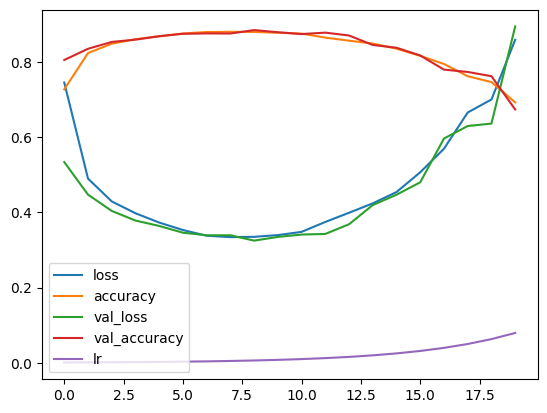

In [156]:
pd.DataFrame(model_4_history.history).plot()

In [158]:
lrs = 1e-3 * 10 ** (tf.range(20)/10)
lrs

<tf.Tensor: shape=(20,), dtype=float64, numpy=
array([0.001     , 0.00125893, 0.00158489, 0.00199526, 0.00251189,
       0.00316228, 0.00398107, 0.00501187, 0.00630957, 0.00794328,
       0.01      , 0.01258925, 0.01584893, 0.01995262, 0.02511886,
       0.03162278, 0.03981072, 0.05011872, 0.06309573, 0.07943282])>

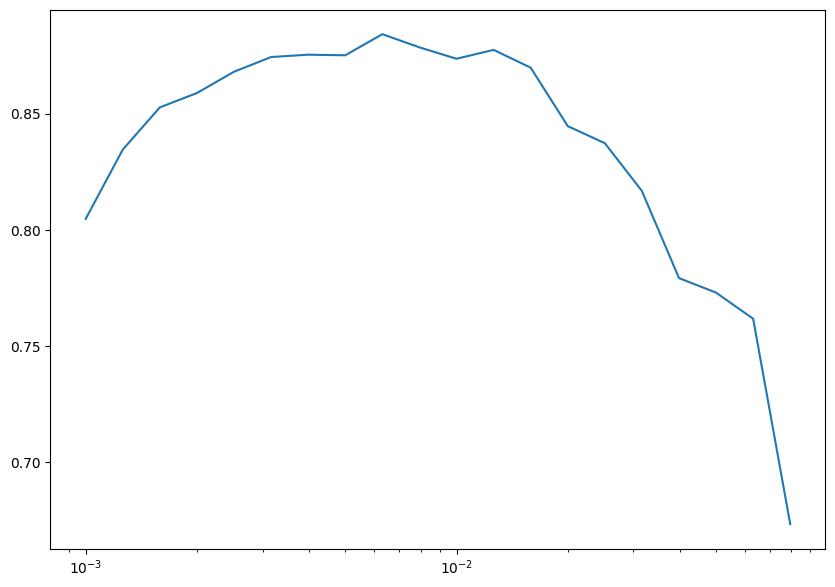

In [160]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, model_4_history.history["val_accuracy"])